# Task 2 Metrics

This notebook demonstrates measuring performance on Task 2.

Before you can measure performance, you need to *prepare* the metric, by running:

    python prepare-metric.py --task2
    
If preparing for the evaluation queries, use a the `--topics` option to specify an alternate topic file (this will not work until evaluation qrels are released).

## Setup

Let's load some Python modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gzip

In [3]:
from tqdm.auto import tqdm
tqdm.pandas(leave=False)

In [4]:
import metrics

## Load Metric

We will load the compiled metric:

In [5]:
with gzip.open('Task2Metric.pkl.gz', 'r') as mpf:
    t2_metric = pickle.load(mpf)

## Apply the Metric

Let's load a run:

In [6]:
run09 = pd.read_csv('runs/task2-prec09.csv')
run09

,id,rep_number,page_id
0,1,1,43711000
1,1,1,13832021
2,1,1,25643451
3,1,1,364542
4,1,1,23610014
...,...,...,...
284995,57,100,66384676
284996,57,100,64322599
284997,57,100,50239948
284998,57,100,46258652


Let's score each query with our metric:

In [15]:
met09 = run09.groupby('id').progress_apply(t2_metric)
met09.head()

  0%|          | 0/57 [00:00<?, ?it/s]

,EE-L,EE-D,EE-R
id,,,
1,3.460852,68.636377,67.626276
2,15.857252,55.322051,40.031449
3,9.098314,40.353097,34.508176
4,8.329282,43.165847,37.325216
5,23.873836,87.732324,55.691646


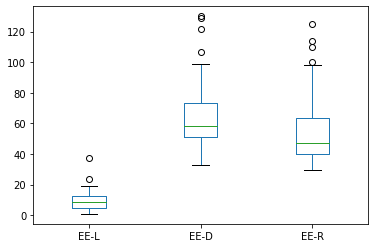

In [16]:
met09.plot.box()

Look at the relevance-disparity relationship:

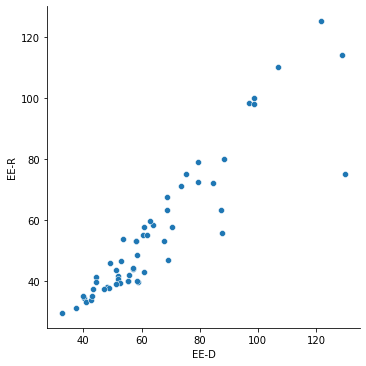

In [17]:
sns.relplot(x='EE-D', y='EE-R', data=met09)